In [74]:
import pandas as pd
import spacy
import gensim
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [8]:
df=pd.read_csv('fake_and_real_news.csv')
df.head()

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [9]:
df.shape

(9900, 2)

In [10]:
df.label.value_counts()

label
Fake    5000
Real    4900
Name: count, dtype: int64

In [11]:
df['label_num']=df['label'].map({
    'Fake':0,
    'Real':1
})

In [12]:
df.head()

,Text,label,label_num
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0
1,U.S. conservative leader optimistic of common ...,Real,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0
4,Democrats say Trump agrees to work on immigrat...,Real,1


In [18]:
data=pd.read_csv('all_news.csv',encoding='unicode_escape')
data.head()

,texts
0,Donald Trump just couldn t wish all Americans ...
1,House Intelligence Committee Chairman Devin Nu...
2,"On Friday, it was revealed that former Milwauk..."
3,"On Christmas day, Donald Trump announced that ..."
4,Pope Francis used his annual Christmas Day mes...


In [19]:
data.shape

(72158, 1)

In [20]:
nlp=spacy.load('en_core_web_lg')

In [25]:
sen=data['texts'].apply(gensim.utils.simple_preprocess)

In [26]:
sen

0        [donald, trump, just, couldn, wish, all, ameri...
1        [house, intelligence, committee, chairman, dev...
2        [on, friday, it, was, revealed, that, former, ...
3        [on, christmas, day, donald, trump, announced,...
4        [pope, francis, used, his, annual, christmas, ...
                               ...                        
72153    [two, indian, air, force, doctors, who, have, ...
72154    [nasa, juno, space, probe, has, discovered, an...
72155    [university, of, konstanz, researchers, have, ...
72156    [renowned, astrophysicist, professor, shashiku...
72157    [scientists, have, found, two, dwarf, giraffes...
Name: texts, Length: 72158, dtype: object

In [28]:
model=gensim.models.Word2Vec(
    window=15,
    min_count=2,
    workers=4
)

In [30]:
model.build_vocab(sen,progress_per=1000)

In [31]:
model.train(sen,total_examples=data.shape[0],epochs=30)

(649643236, 810282090)

In [33]:
model.wv.similarity(w1='good',w2='well')

0.3208628

In [34]:
model.wv.similarity(w1='good',w2='good')

0.99999994

In [35]:
model.wv.most_similar('good')

[('bad', 0.7948259711265564),
 ('great', 0.700438916683197),
 ('best', 0.615281879901886),
 ('nice', 0.5957589745521545),
 ('big', 0.5746447443962097),
 ('happy', 0.5654069781303406),
 ('wonderful', 0.5642993450164795),
 ('terrible', 0.5603330135345459),
 ('sad', 0.5560271739959717),
 ('ûïgood', 0.5460181832313538)]

In [36]:
model.wv.get_mean_vector(['worry','understand'])

array([-0.04188424, -0.15960184,  0.10243255, -0.07551287,  0.05108891,
       -0.07923163,  0.06658479, -0.00778067, -0.04330095, -0.01502826,
       -0.13145691,  0.08924788,  0.00512541,  0.02091096,  0.00620236,
       -0.08572938,  0.0867833 ,  0.00285356, -0.0015462 , -0.08776444,
       -0.01935246,  0.03005608,  0.09921838, -0.10619088, -0.04208838,
       -0.10815655,  0.08487785, -0.04358341, -0.09418537,  0.09112844,
        0.105754  , -0.04894894, -0.18003829,  0.12365069,  0.00893395,
       -0.06570331, -0.02905753,  0.02287699,  0.00093022, -0.10838614,
       -0.04767582, -0.02140042,  0.07998741,  0.23323622, -0.02972533,
        0.00735948, -0.01568069, -0.0452344 ,  0.08303065, -0.07563606,
        0.07335704,  0.00478283, -0.07057221, -0.06302091, -0.10027812,
        0.059261  ,  0.11892514, -0.05293966, -0.08752592,  0.00117845,
        0.06076736,  0.00651101,  0.04266606, -0.15799953, -0.17099449,
        0.0412748 , -0.09151581,  0.03731912,  0.13529348,  0.12

In [37]:
len(model.wv.get_mean_vector(['worry','understand']))

100

In [38]:
model.wv['good']

array([ -4.1559305 ,  -5.928827  ,  -1.2914207 ,   1.4036605 ,
         6.1063113 ,  -1.1341707 ,   1.0903789 ,  -0.94827795,
         2.0571427 ,  -1.1719959 ,  -0.26236135,   3.5991483 ,
        -3.2838814 ,   0.7630518 ,   1.3094214 ,   0.9951051 ,
         1.1160084 ,  -0.37995926,   2.7830544 ,   2.3657389 ,
         0.47797403,  -5.514417  ,   0.8405339 ,  -3.6720245 ,
        -1.3739525 ,  -2.1248317 ,   3.7510624 ,  -2.3586648 ,
         0.86846393,   1.945035  ,   0.10748545,  -6.5340843 ,
        -1.4046888 ,  -3.6471255 ,   2.552086  ,  -0.60138804,
        -2.1880307 ,  -2.953119  ,   0.40230182,  -4.5127115 ,
        -0.44529477,  -2.8970268 ,  -0.40938985,   3.3516607 ,
        -0.38235596,  -1.5726156 ,   4.310907  ,  -0.98581403,
         0.67750657,  -6.0415683 ,  -1.0720822 ,  -4.052423  ,
         0.61461014, -10.261132  ,  -0.65789634,   6.357897  ,
         5.2688494 ,   1.6274986 ,  -3.453799  ,  -5.664184  ,
        -4.3331976 ,  -1.1184013 ,  -3.644675  ,   3.75

In [39]:
len(model.wv['good'])

100

In [45]:
def preprocessing_and_vectorize(text):
    doc=nlp(text)
    tokens=[]
    for token in doc:
        if token.is_punct or token.is_stop:
            continue
        tokens.append(token.lemma_)
    return model.wv.get_mean_vector(tokens)

In [46]:
df['vector']=df['Text'].apply(preprocessing_and_vectorize)

In [47]:
df.head()

,Text,label,label_num,vector
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0,"[-0.031247323, -0.04827995, 0.048157968, -0.01..."
1,U.S. conservative leader optimistic of common ...,Real,1,"[-0.016201196, 0.007183526, 0.0056833564, 0.01..."
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1,"[-0.014588407, 0.0009242861, 0.027419273, -0.0..."
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0,"[-0.0016664162, 0.020361127, -0.0053699636, -0..."
4,Democrats say Trump agrees to work on immigrat...,Real,1,"[-0.03275438, -0.0055802288, 0.0236319, -0.008..."


In [49]:
X_train,X_test,y_train,y_test=train_test_split(df['vector'],df['label_num'],test_size=0.2,random_state=101,
                                              stratify=df['label_num'],shuffle=True)

In [50]:
X_train

2370    [-0.012528018, 0.021711616, 0.022072988, 0.014...
2278    [-0.018061906, -0.022593455, 0.04285057, -0.00...
1114    [-0.010478051, 0.011013286, 0.021104325, 0.006...
5355    [0.01487144, 0.038022906, 0.020632932, -0.0161...
5018    [-0.024151823, 0.006733743, 0.023948206, 0.024...
                              ...                        
7711    [-0.0056694136, -0.016276587, 0.019355102, 0.0...
2445    [-0.0053149015, 0.006035825, 0.01055243, -0.01...
5747    [0.007045328, 0.0100930575, 0.00076824904, 0.0...
4996    [-0.02966494, -0.0057813567, 0.005408599, 0.00...
3969    [-0.03414605, -0.03526895, -0.035819408, -0.05...
Name: vector, Length: 7920, dtype: object

In [52]:
X_train.shape

(7920,)

In [53]:
X_test.shape

(1980,)

In [54]:
y_train.value_counts()

label_num
0    4000
1    3920
Name: count, dtype: int64

In [55]:
y_test.value_counts()

label_num
0    1000
1     980
Name: count, dtype: int64

In [57]:
X_train_2d=np.stack(X_train)
X_test_2d=np.stack(X_test)

In [59]:
X_train_2d

array([[-0.01252802,  0.02171162,  0.02207299, ..., -0.02930767,
        -0.01003207, -0.00343915],
       [-0.01806191, -0.02259346,  0.04285057, ...,  0.02768688,
        -0.02181142,  0.02669482],
       [-0.01047805,  0.01101329,  0.02110432, ..., -0.03129005,
        -0.0451973 ,  0.0169284 ],
       ...,
       [ 0.00704533,  0.01009306,  0.00076825, ...,  0.00626965,
        -0.00227514,  0.03926522],
       [-0.02966494, -0.00578136,  0.0054086 , ...,  0.01767019,
        -0.00439252,  0.01006276],
       [-0.03414605, -0.03526895, -0.03581941, ...,  0.06270663,
         0.00566544,  0.02364725]], dtype=float32)

In [63]:
scaler=MinMaxScaler()

In [64]:
X_train_scaled=scaler.fit_transform(X_train_2d)
X_test_scaled=scaler.fit_transform(X_test_2d)

In [66]:
nb=MultinomialNB()
nb.fit(X_train_scaled,y_train)

MultinomialNB()

In [67]:
pred_nb=nb.predict(X_test_scaled)

In [69]:
print(classification_report(y_test,pred_nb))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87      1000
           1       0.84      0.93      0.88       980

    accuracy                           0.88      1980
   macro avg       0.88      0.88      0.88      1980
weighted avg       0.88      0.88      0.88      1980



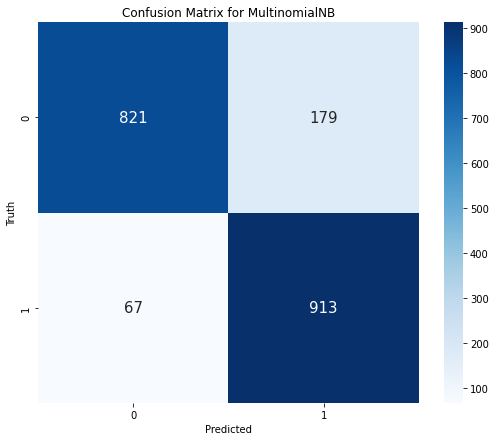

In [73]:
plt.figure(figsize=(9,7))
sns.heatmap(confusion_matrix(y_test,pred_nb),annot=True,square=True,cbar=True,annot_kws={'size':15},fmt='d',cmap='Blues')
plt.title('Confusion Matrix for MultinomialNB')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [75]:
rf=RandomForestClassifier()

In [76]:
rf.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [77]:
pred_rf=rf.predict(X_test_scaled)

In [78]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      1000
           1       0.89      0.97      0.93       980

    accuracy                           0.93      1980
   macro avg       0.93      0.93      0.93      1980
weighted avg       0.93      0.93      0.93      1980



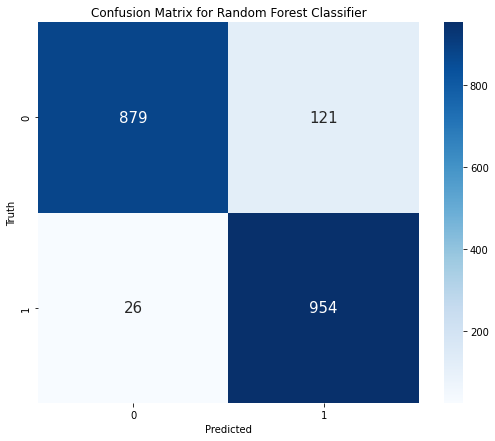

In [79]:
plt.figure(figsize=(9,7))
sns.heatmap(confusion_matrix(y_test,pred_rf),annot=True,square=True,cbar=True,annot_kws={'size':15},fmt='d',cmap='Blues')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()